## This notebook contains prototyping work for implementing the viterbi decode algorithm

In [2]:
import numpy as np

def viterbi(A, B, sequence):
    '''

    ~~~~ ARGUMENTS ~~~~
    sequence : list
        - a sequence of labels
    A : numpy array
        - transition table
        - shape = [number of notes + 1 for <start>, number of notes]
        - NOTE: the <start> token should be indexed at the last row
    B : numpy array
        - emission table
        - shape = [number of notes, number of possible labels]
    '''
    # let's work in log space
    A = np.log(A)
    B = np.log(B)

    num_notes = B.shape[0]

    # create empty viterbi matrix and backpointer matrix
    viterbi = np.full((num_notes, len(sequence)), None)
    bp = np.full((num_notes, len(sequence)), None)

    # Compute the first column
    first_label = sequence[0]
    start_token = A.shape[0]
    for n in range(num_notes):
        viterbi[n,0] = A[-1,n] + B[n,first_label]
        bp[n,0] = start_token

    for w in range(1, len(sequence)):
        for n in range(num_notes):
            viterbi[n,w], bp[n,w] = compute_viterbi_val(n=n, w=w, viterbi=viterbi, A_prev=A[:,n]) #transitions from previous note to current note

    # Find maximum value of last column of viterbi
    max_idx = np.argmax(viterbi[:,-1])

    # Trace back maximum indices in backpointer table
    note_sequence = [max_idx]
    for i in range(0,len(sequence)):
        reverse_i = len(sequence)-i-1
        note_sequence.append(bp[note_sequence[i-1], reverse_i])
    
    note_sequence.reverse()
    return note_sequence

def compute_viterbi_val(n, w, viterbi, A_prev):
    # Compute first viterbi value
    current_val = viterbi[0,w-1] + A_prev[0]
    max_val = current_val
    bp = 0

    # Loop through rest of values
    for i, v in enumerate(list(viterbi[:,w-1])):
        current_val = v + A_prev[i]
        if current_val > max_val:
            max_val = current_val
            bp = i
    
    return max_val, bp


B = np.ones(shape=(32, 12000))/32 # emission
A = np.ones(shape=(33,32))/33     # transition
sequence = [4, 0, 100, 4000, 3222, 11000, 2222]

note_sequence = viterbi(A, B, sequence)
print(note_sequence)

[33, 0, 0, 0, 0, 0, 0, 0]


(33, 32)

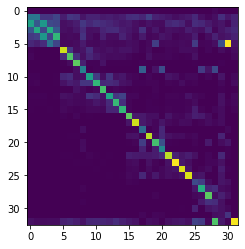

In [8]:
import matplotlib.pyplot as plt

A = np.load('trans_prob_table.npy')

def modify_trans_table(A):
    A = A[:,1:]
    new_A = np.zeros_like(A)
    new_A[:-1,:] = A[1:,:]
    new_A[-1,:] = A[0,:]
    return A

A = modify_trans_table(A)
plt.imshow(A)
A.shape

